<a href="https://colab.research.google.com/github/ananyak091/VOIS_AICTE_Oct2025_MajorProject_AnanyaKundu/blob/main/Netflix_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required libraries (if not already available)
!pip install pandas matplotlib seaborn plotly

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set plot styles
plt.style.use('seaborn-v0_8')
sns.set_palette('pastel')

# Display all columns in dataframes
pd.set_option('display.max_columns', None)


In [2]:
# Load the Netflix dataset
file_path = '/content/Netflix Dataset.csv'  # Change if your path is different
df = pd.read_csv(file_path)

# Quick check
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (7789, 11)


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
# Check for null values
df.isnull().sum()

# Fill or clean null values for basic analysis
df['Director'] = df['Director'].fillna('Unknown')
df['Cast'] = df['Cast'].fillna('Unknown')
df['Country'] = df['Country'].fillna('Unknown')
df['Rating'] = df['Rating'].fillna('Not Rated')

# Convert 'Release_Date' to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Extract Year for trend analysis
df['Year'] = df['Release_Date'].dt.year

# Handle missing years (drop rows without year if needed)
df = df.dropna(subset=['Year'])

# Reset index
df.reset_index(drop=True, inplace=True)


In [4]:
print("Basic Info:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe(include='all'))


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7691 entries, 0 to 7690
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7691 non-null   object        
 1   Category      7691 non-null   object        
 2   Title         7691 non-null   object        
 3   Director      7691 non-null   object        
 4   Cast          7691 non-null   object        
 5   Country       7691 non-null   object        
 6   Release_Date  7691 non-null   datetime64[ns]
 7   Rating        7691 non-null   object        
 8   Duration      7691 non-null   object        
 9   Type          7691 non-null   object        
 10  Description   7691 non-null   object        
 11  Year          7691 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 721.2+ KB
None

Descriptive Statistics:
       Show_Id Category              Title Director     Cast        Country  


Category Distribution:
 Category
Movie      5379
TV Show    2312
Name: count, dtype: int64


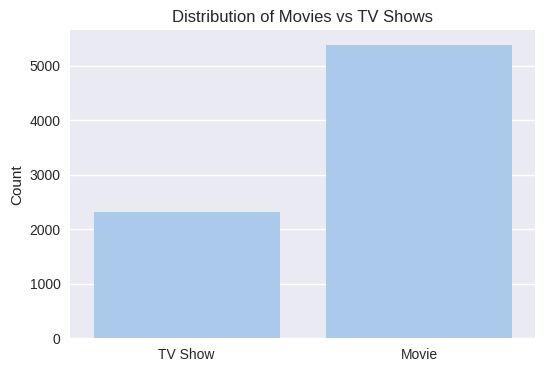

In [5]:
category_counts = df['Category'].value_counts()
print("\nCategory Distribution:\n", category_counts)

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Category')
plt.title('Distribution of Movies vs TV Shows')
plt.xlabel('')
plt.ylabel('Count')
plt.show()


**Analyze the distribution of Movies vs. TV Shows over the years**

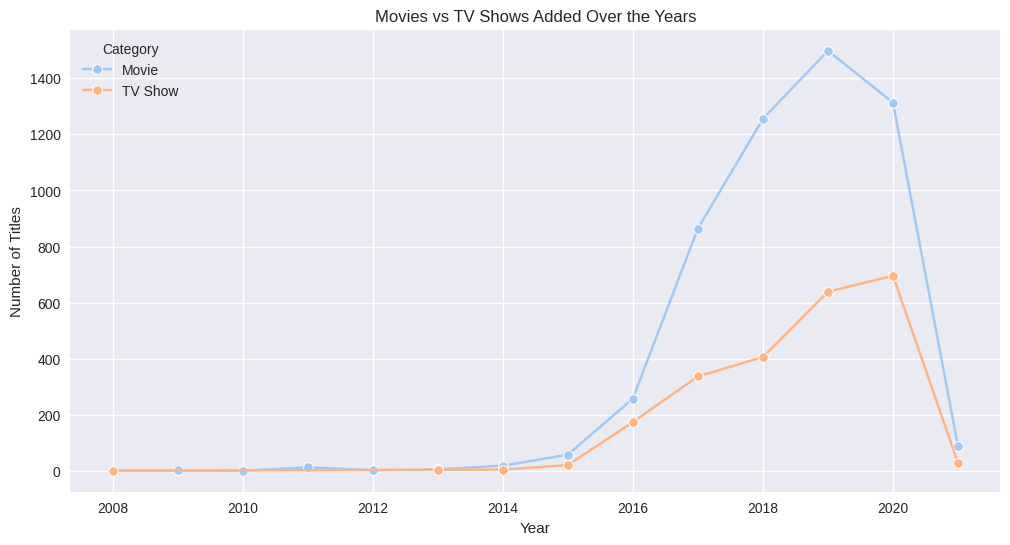

In [6]:
category_trend = df.groupby(['Year','Category']).size().reset_index(name='Count')

plt.figure(figsize=(12,6))
sns.lineplot(data=category_trend, x='Year', y='Count', hue='Category', marker='o')
plt.title('Movies vs TV Shows Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend(title='Category')
plt.show()


**Identify the most common genres and how their popularity has changed over time**

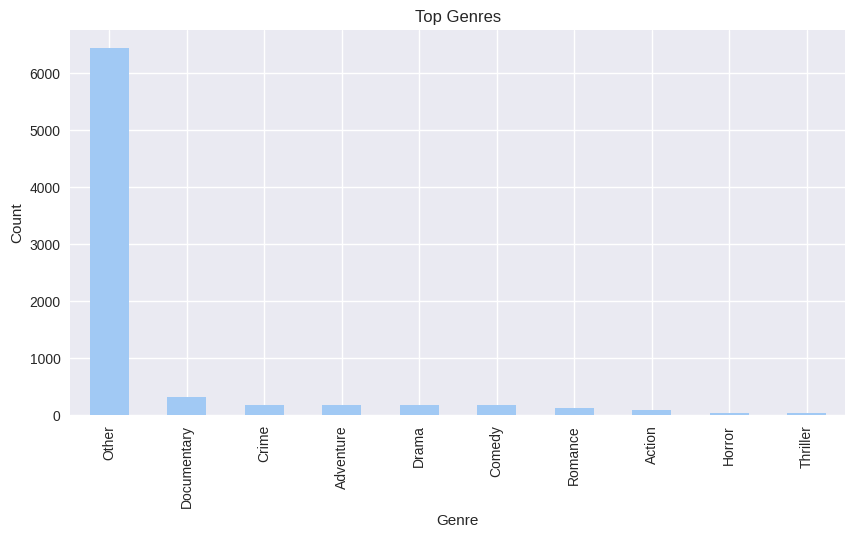

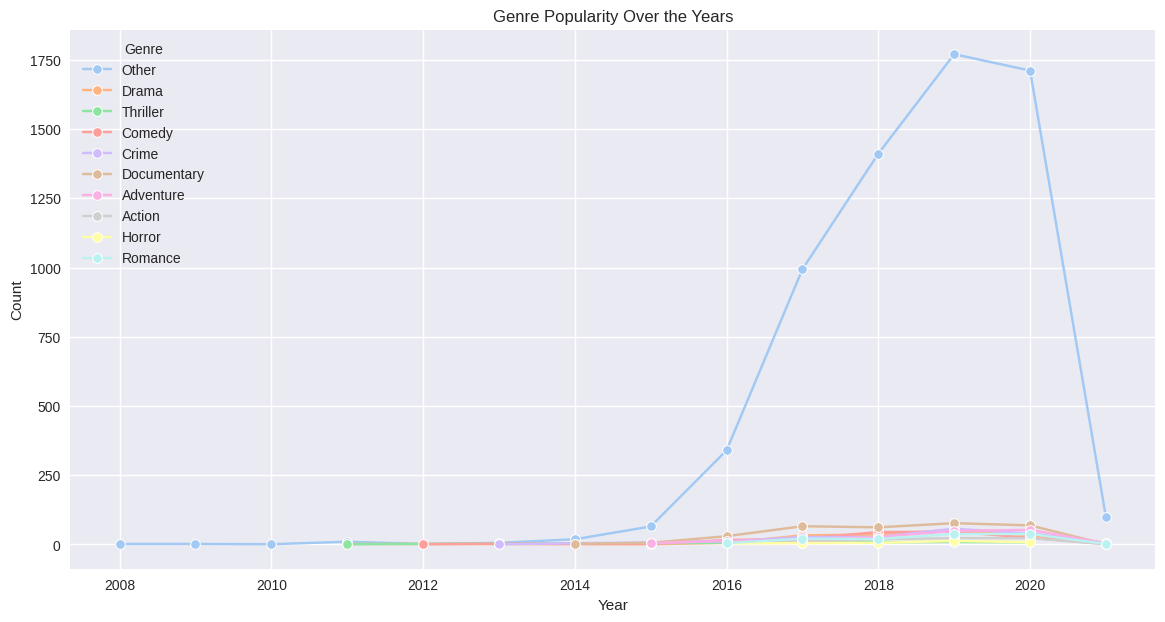

In [8]:
# Quick keyword-based genre extraction (beginner-friendly)
genre_keywords = ['Comedy','Drama','Action','Romance','Documentary','Horror','Thriller','Crime','Adventure','Sci-Fi']
def find_genre(desc):
    for g in genre_keywords:
        if pd.notna(desc) and g.lower() in desc.lower():
            return g
    return 'Other'

df['Genre'] = df['Description'].apply(find_genre)

# Top 10 genres
top_genres = df['Genre'].value_counts().head(10)
top_genres.plot(kind='bar', figsize=(10,5), title='Top Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

# Genre trend over time
genre_trend = df.groupby(['Year','Genre']).size().reset_index(name='Count')
top_genre_names = top_genres.index.tolist()
genre_trend = genre_trend[genre_trend['Genre'].isin(top_genre_names)]

plt.figure(figsize=(14,7))
sns.lineplot(data=genre_trend, x='Year', y='Count', hue='Genre', marker='o')
plt.title('Genre Popularity Over the Years')
plt.show()

**Compare country-wise contributions to Netflix’s catalog**

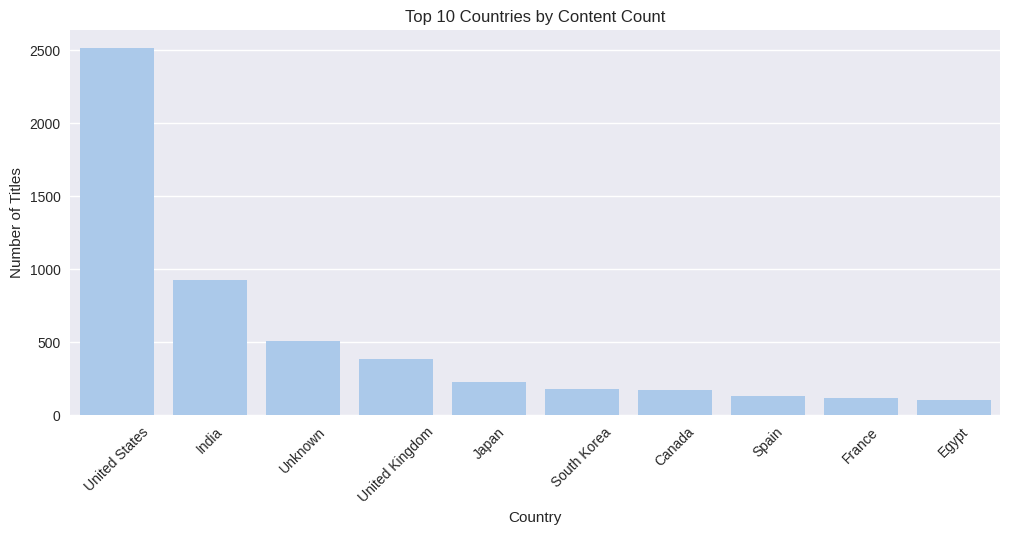

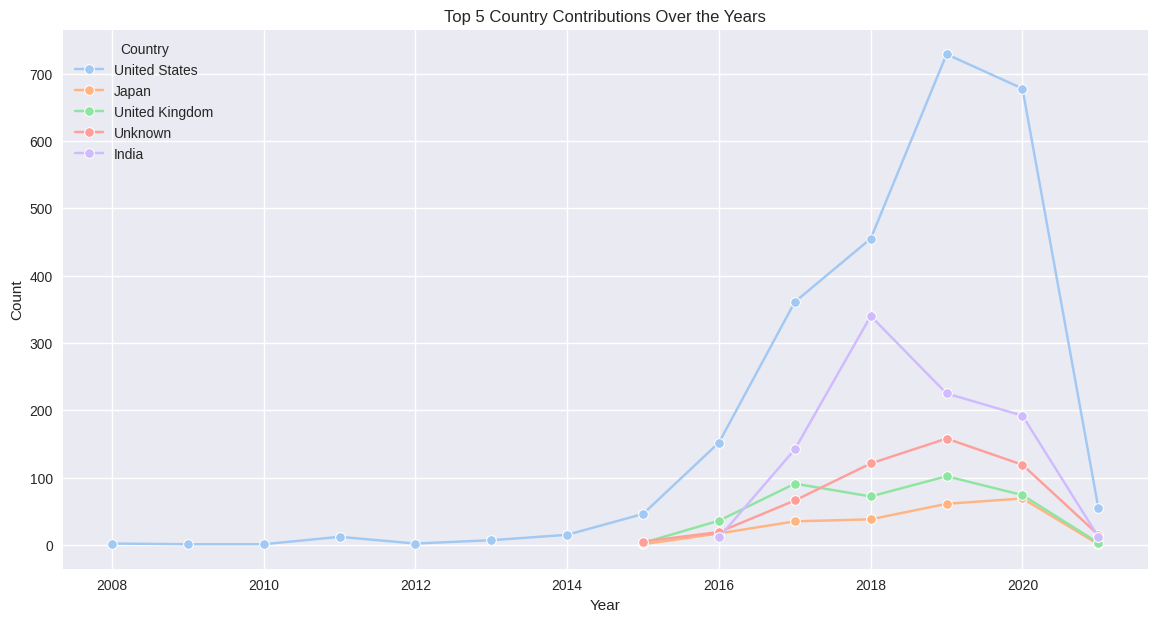

In [9]:
# Top 10 countries contributing content
top_countries = df['Country'].value_counts().head(10)
plt.figure(figsize=(12,5))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries by Content Count')
plt.xticks(rotation=45)
plt.ylabel('Number of Titles')
plt.show()

# Country contribution trend over time (top 5 for clarity)
top5 = top_countries.index[:5]
country_trend = df[df['Country'].isin(top5)].groupby(['Year','Country']).size().reset_index(name='Count')

plt.figure(figsize=(14,7))
sns.lineplot(data=country_trend, x='Year', y='Count', hue='Country', marker='o')
plt.title('Top 5 Country Contributions Over the Years')
plt.show()


**Analyze rating distributions over time**

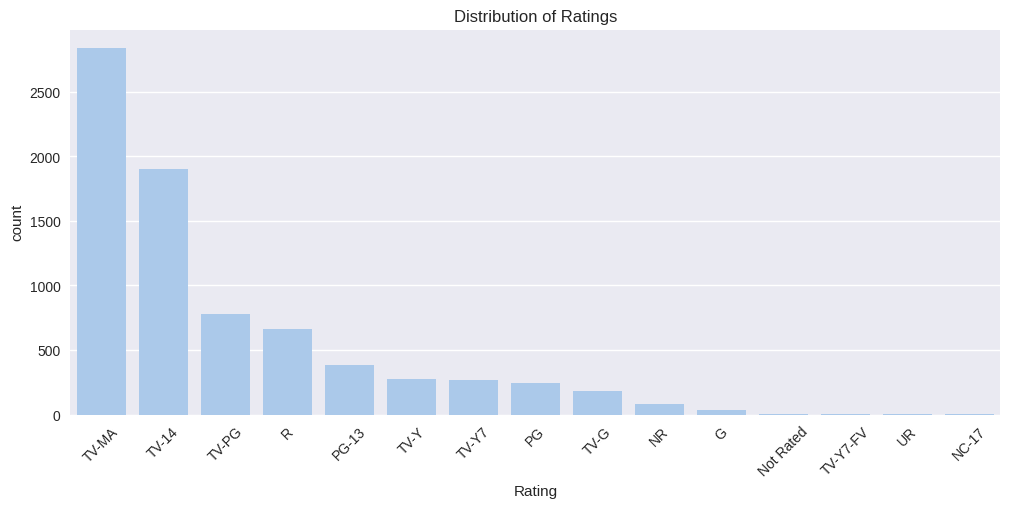

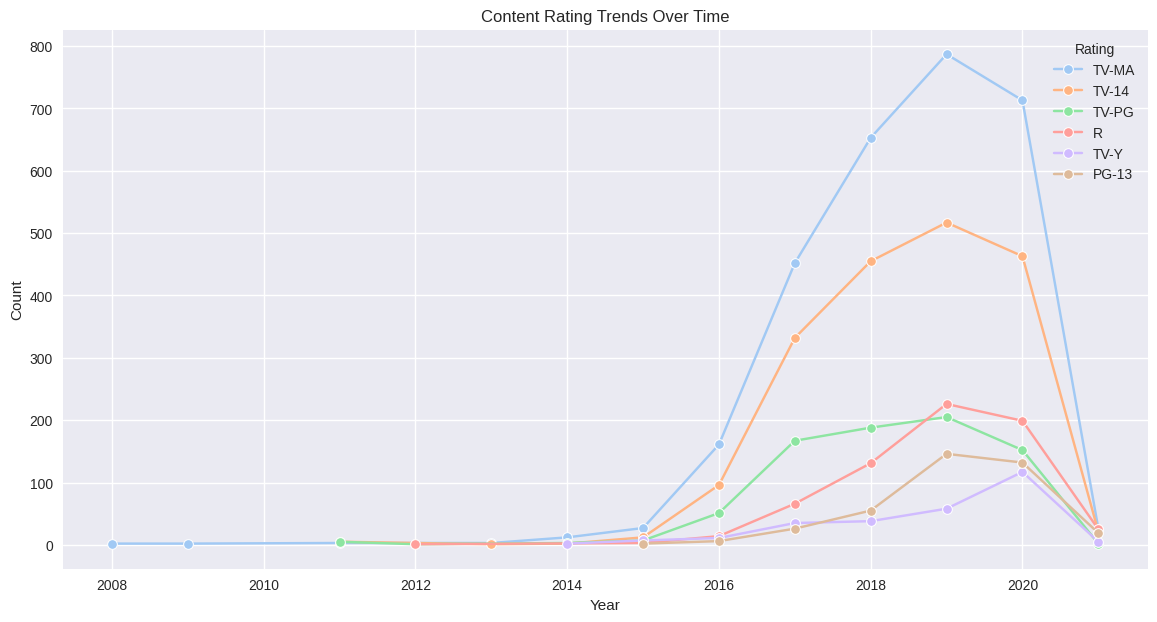

In [10]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Rating', order=df['Rating'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Ratings')
plt.show()

# Rating trend
rating_trend = df.groupby(['Year','Rating']).size().reset_index(name='Count')
top_ratings = df['Rating'].value_counts().head(6).index
rating_trend = rating_trend[rating_trend['Rating'].isin(top_ratings)]

plt.figure(figsize=(14,7))
sns.lineplot(data=rating_trend, x='Year', y='Count', hue='Rating', marker='o')
plt.title('Content Rating Trends Over Time')
plt.show()


**Identify periods of significant content growth**

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1690437413.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['Duration_Num'] = df['Duration'].str.extract('(\d+)').astype(float)


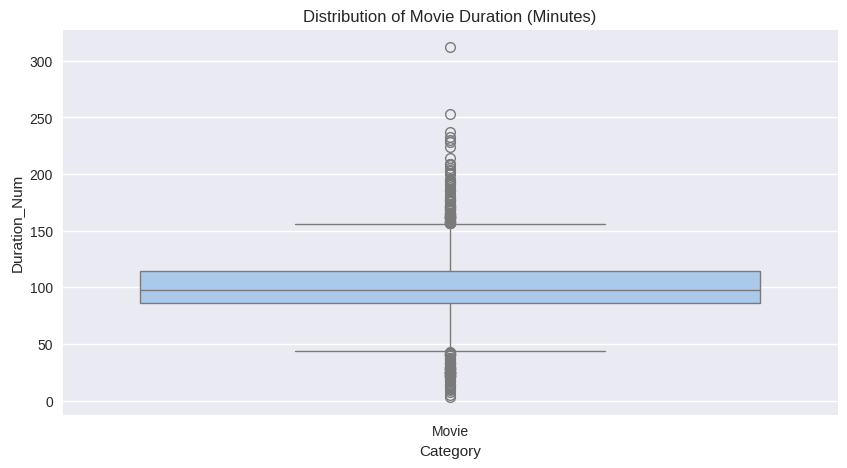

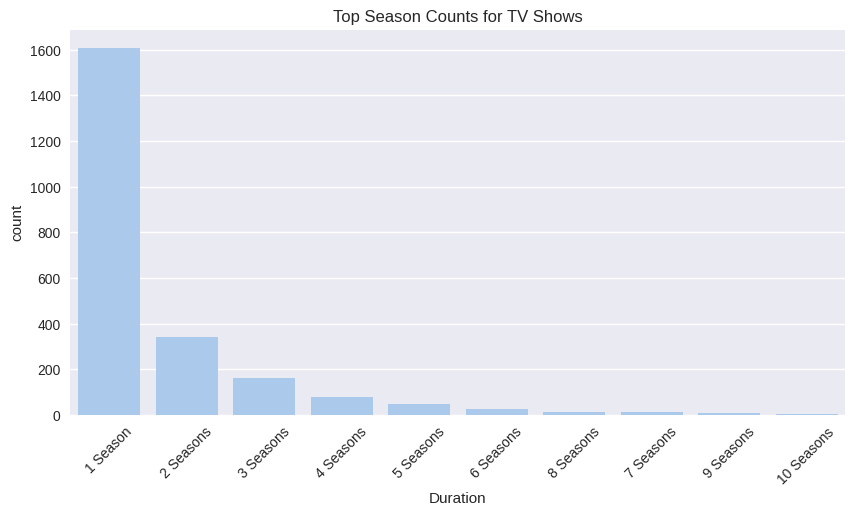

In [11]:
# Split numeric value from 'Duration' for Movies (e.g., '90 min') and TV (e.g., '2 Seasons')
df['Duration_Num'] = df['Duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(10,5))
sns.boxplot(data=df[df['Category']=='Movie'], x='Category', y='Duration_Num')
plt.title('Distribution of Movie Duration (Minutes)')
plt.show()

# TV Shows - number of seasons
tv_df = df[df['Category']=='TV Show']
plt.figure(figsize=(10,5))
sns.countplot(x='Duration', data=tv_df, order=tv_df['Duration'].value_counts().index[:10])
plt.xticks(rotation=45)
plt.title('Top Season Counts for TV Shows')
plt.show()
